In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

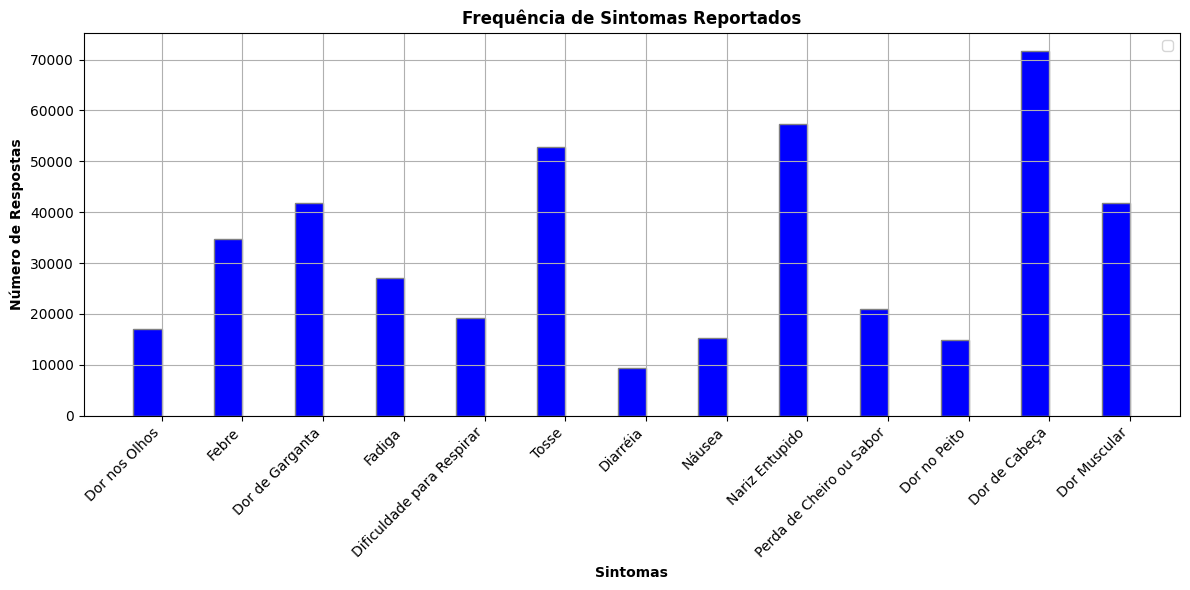

In [13]:
df = pd.read_csv('/content/Os sintomas que mais levaram para o hospital.csv')

fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Localização das barras
r1 = range(len(df['Sintoma']))
r2 = [x + bar_width for x in r1]

# Criar as barras
ax.bar(r1, df['Sim'], color='b', width=bar_width, edgecolor='grey')

# Adicionar rótulos e título
ax.set_xlabel('Sintomas', fontweight='bold')
ax.set_ylabel('Número de Respostas', fontweight='bold')
ax.set_title('Frequência de Sintomas Reportados', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(df['Sintoma']))])
ax.set_xticklabels(df['Sintoma'], rotation=45, ha='right')

# Adicionar legenda
ax.legend()
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

<ipython-input-14-f100928e6479>:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=df2, x='Raca', y='Frequencia', hue='Teste_de_Covid', palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

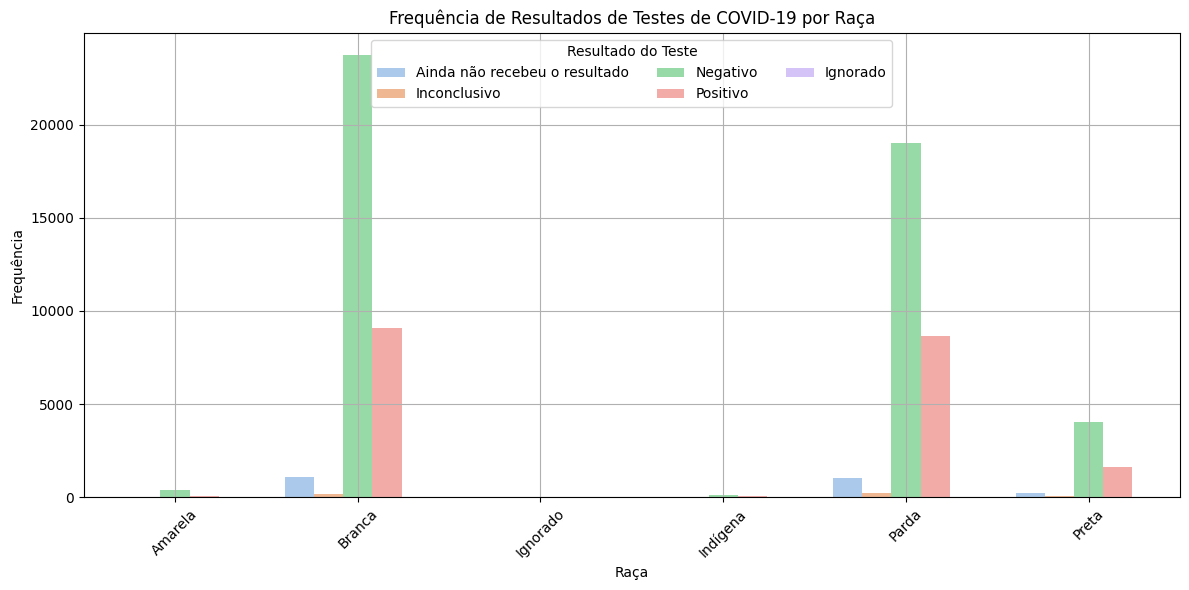

In [14]:
df2 = pd.read_csv('/content/Teste de covid por raça.csv')

# Definir a paleta de cores
palette = sns.color_palette("pastel")

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='Raca', y='Frequencia', hue='Teste_de_Covid', palette=palette)

# Adicionar título e rótulos
plt.title('Frequência de Resultados de Testes de COVID-19 por Raça')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid()
# Ajustar a legenda para o canto superior
plt.legend(title='Resultado do Teste', loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [15]:
df3 = pd.read_csv('/content/Foi internado.csv')

In [16]:
df3.head()

,Tosse,Dor_no_Peito,Dificuldade_para_Respirar,Internado,Entubado
0,Sim,Sim,Sim,Sim,Não
1,Sim,Sim,Sim,Sim,Não
2,Sim,Sim,Não,Sim,Não
3,Sim,Sim,Sim,Sim,Não
4,Sim,Sim,Sim,Sim,Sim


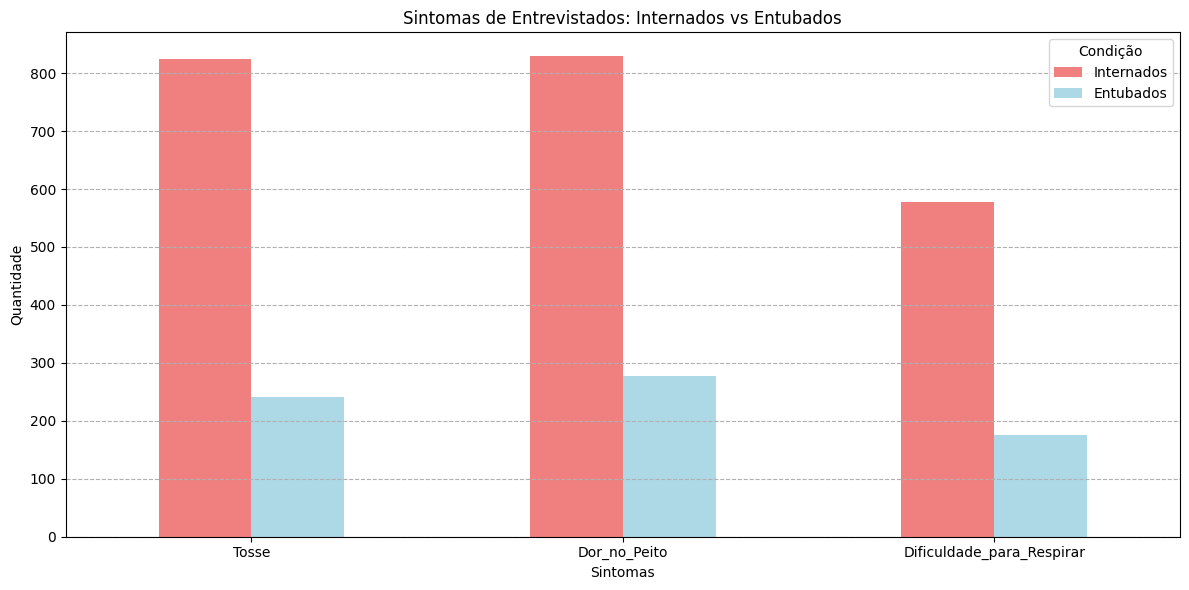

In [17]:

# Contar a quantidade de sintomas para cada condição de internação e entubação
internados = df3[df3['Internado'] == 'Sim']
entubados = df3[df3['Entubado'] == 'Sim']

# Contar sintomas para internados
contagem_internados = {
    'Tosse': internados['Tosse'].value_counts().get('Sim', 0),
    'Dor_no_Peito': internados['Dor_no_Peito'].value_counts().get('Sim', 0),
    'Dificuldade_para_Respirar': internados['Dificuldade_para_Respirar'].value_counts().get('Sim', 0)
}

# Contar sintomas para entubados
contagem_entubados = {
    'Tosse': entubados['Tosse'].value_counts().get('Sim', 0),
    'Dor_no_Peito': entubados['Dor_no_Peito'].value_counts().get('Sim', 0),
    'Dificuldade_para_Respirar': entubados['Dificuldade_para_Respirar'].value_counts().get('Sim', 0)
}

# Criar DataFrame para plotagem
contagem_df = pd.DataFrame({
    'Internados': contagem_internados,
    'Entubados': contagem_entubados
})
# Criar a figura antes de gerar o gráfico
plt.figure(figsize=(12, 6))

# Criar gráfico de barras usando Matplotlib diretamente
contagem_df.plot(kind='bar', stacked=False, color=['lightcoral', 'lightblue'], ax=plt.gca())

# Adicionar título e rótulos
plt.title('Sintomas de Entrevistados: Internados vs Entubados')
plt.xlabel('Sintomas')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Ajustar a legenda
plt.legend(title='Condição')

# Exibir o gráfico
plt.show()

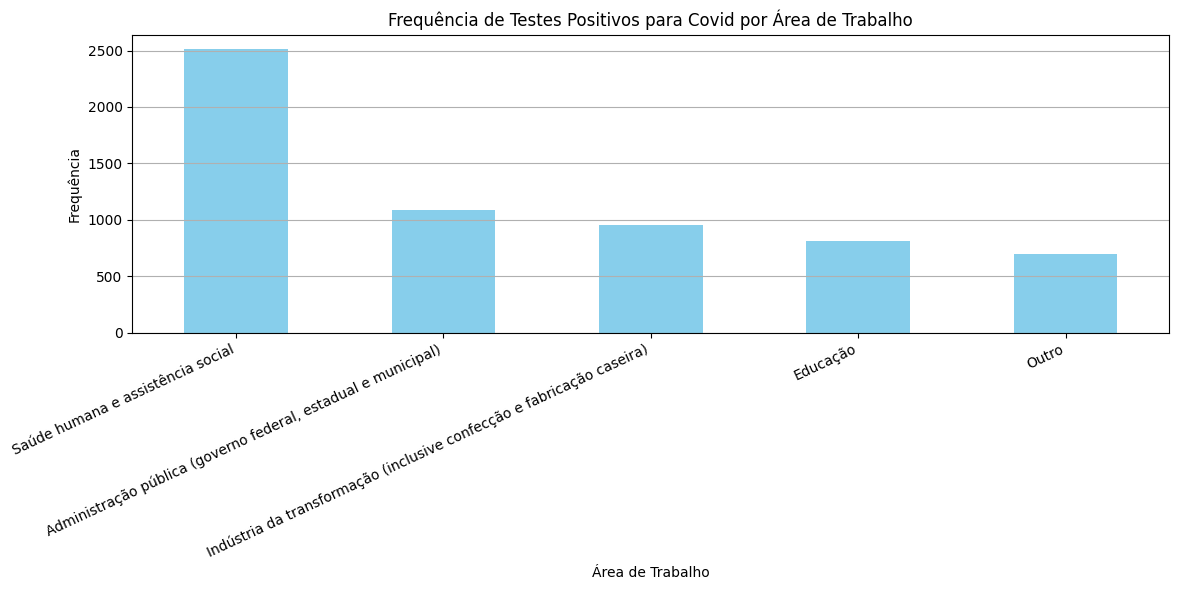

In [18]:
df4 = pd.read_csv('/content/Empregos mais atingidos.csv')

# Contando a frequência de cada área de trabalho
area_count = df4['Empregos'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
area_count.plot(kind='bar', color='skyblue')
plt.title('Frequência de Testes Positivos para Covid por Área de Trabalho')
plt.xlabel('Área de Trabalho')
plt.ylabel('Frequência')
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [19]:
df6 = pd.read_csv('/content/Frequencia por area.csv')

df6['Area'] = df6['Area'].replace({
    "Resto da RM (Região Metropolitana, excluindo a capital)": "Resto RM",
    "Resto da RIDE (Região Integrada de Desenvolvimento Econômico, excluindo a capital)": "Resto RIDE",
    "Resto da UF (Unidade da Federação, excluindo a região metropolitana e a RIDE)": "Resto UF"
})

df6.head()

,Area,Frequencia,Frequencia_uso
0,Capital,Sim,91108
1,Capital,Não,55558
2,Resto RM,Não,33040
3,Resto RM,Sim,50228
4,Resto RIDE,Sim,4705


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


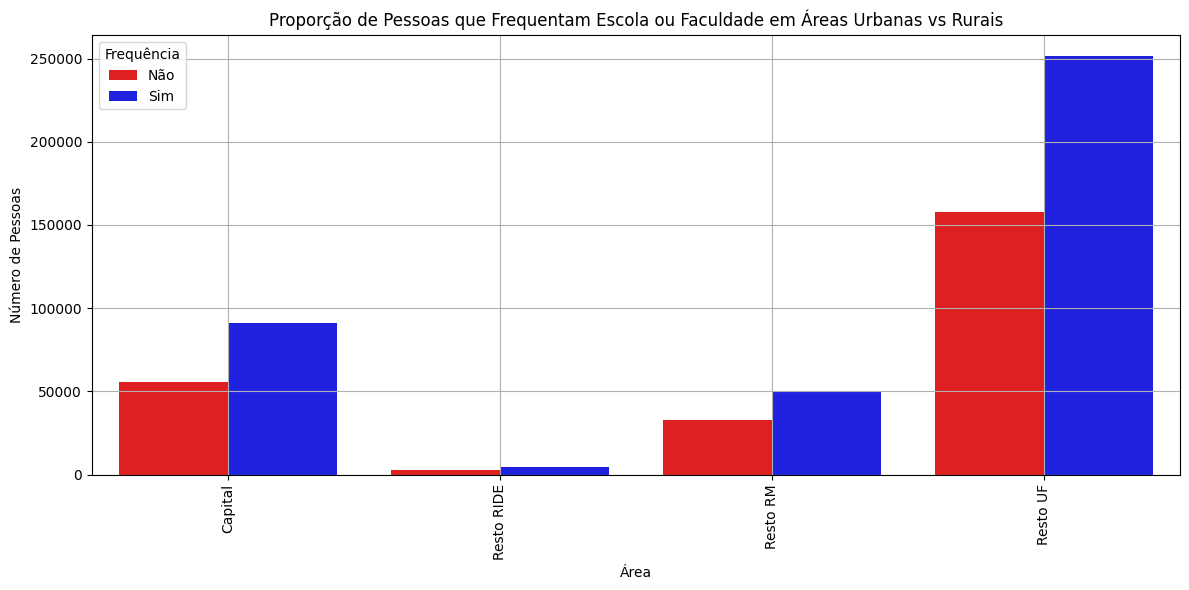

In [20]:
grouped_data = df6.groupby(['Area', 'Frequencia'])['Frequencia_uso'].sum().reset_index()

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras com Seaborn
sns.barplot(x='Area', y='Frequencia_uso', hue='Frequencia', data=grouped_data,palette={'Sim': 'blue', 'Não': 'red'})

# Adicionar título e rótulos
plt.title('Proporção de Pessoas que Frequentam Escola ou Faculdade em Áreas Urbanas vs Rurais')
plt.xlabel('Área')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=90)

# Adicionar legenda
plt.legend(title='Frequência')
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

<ipython-input-21-6680da3dd4ec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequencia', y='Motivo', data=df7, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

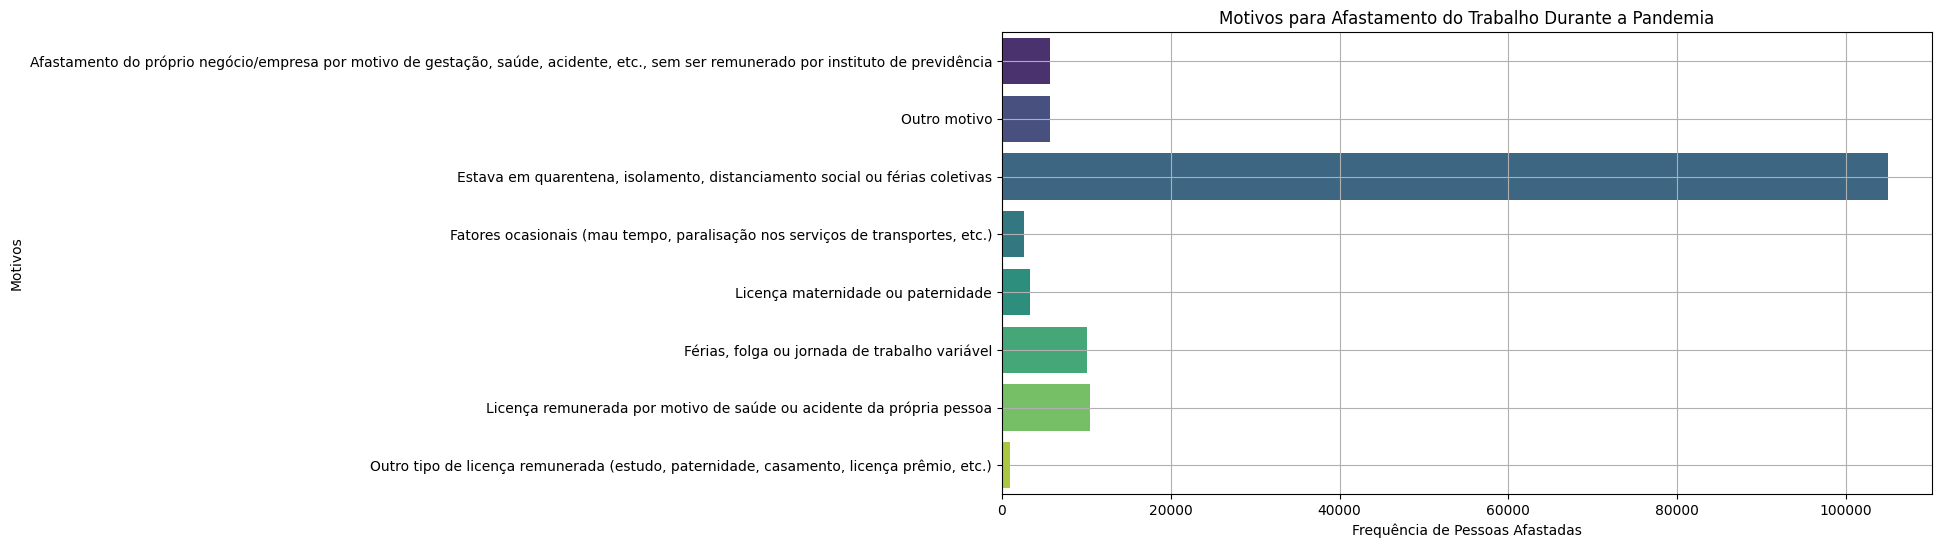

In [21]:
df7 = pd.read_csv('/content/Foi afastado.csv')

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
sns.barplot(x='frequencia', y='Motivo', data=df7, palette='viridis')

# Adicionar título e rótulos
plt.title('Motivos para Afastamento do Trabalho Durante a Pandemia')
plt.xlabel('Frequência de Pessoas Afastadas')
plt.ylabel('Motivos')

# Exibir o gráfico
plt.grid()
plt.show()

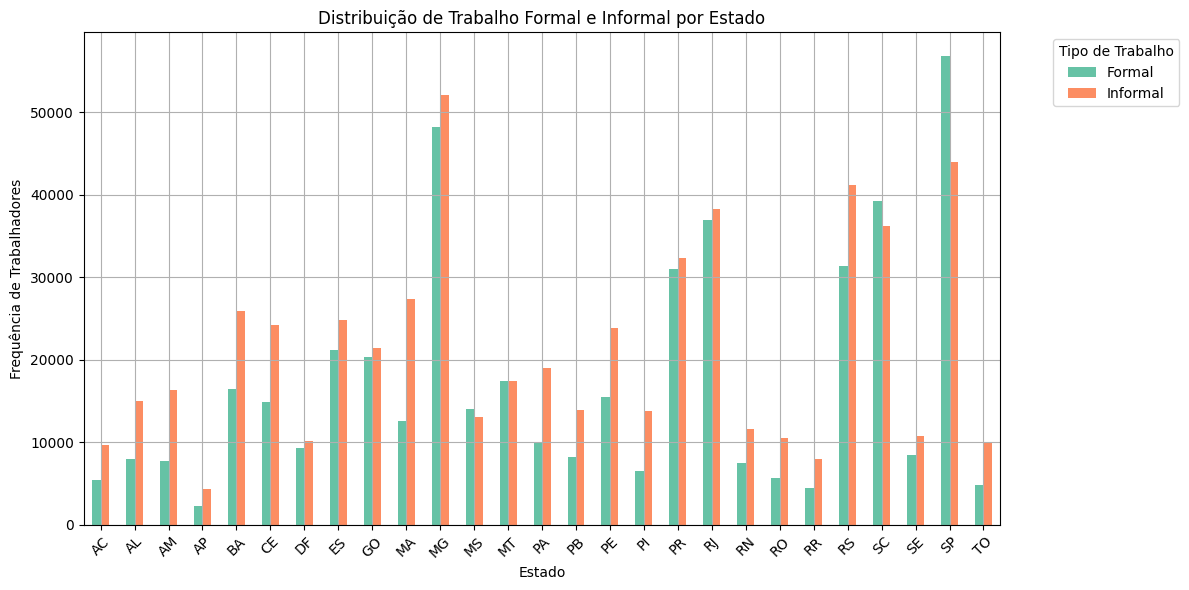

In [22]:
df8 = pd.read_csv('/content/Tipo de trabalho.csv')

# Definindo trabalho formal e informal
formal = [
    'Empregado do setor privado',
    'Empregado do setor público',
    'Empregador',
    'Trabalhador doméstico',
    'Militar do exercito, marinha ou aeronáutica',
    'Policial militar ou bombeiro mlitar'
]
informal = [
    'Conta própria',
    'Trabalhador familiar não remunerado',
    'Estava fora do mercado de trabalho (fazia apenas afazeres domésticos, cuidados de pessoas ou produção para próprio consumo)',
]

# Classificando tipos de trabalho
df8['Tipo Trabalho'] = df8['Trabalho'].apply(lambda x: 'Formal' if x in formal else 'Informal')

# Agrupando dados por estado e tipo de trabalho
grouped_data = df8.groupby(['sigla_uf', 'Tipo Trabalho'])['frequencia'].sum().unstack()

# Configurando o gráfico
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', color=['#66c2a5', '#fc8d62'], edgecolor='none', ax=plt.gca())

# Personalizando o gráfico
plt.title('Distribuição de Trabalho Formal e Informal por Estado')
plt.xlabel('Estado')
plt.ylabel('Frequência de Trabalhadores')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Trabalho', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Exibindo o gráfico
plt.tight_layout()  # Ajuste do layout
plt.show()

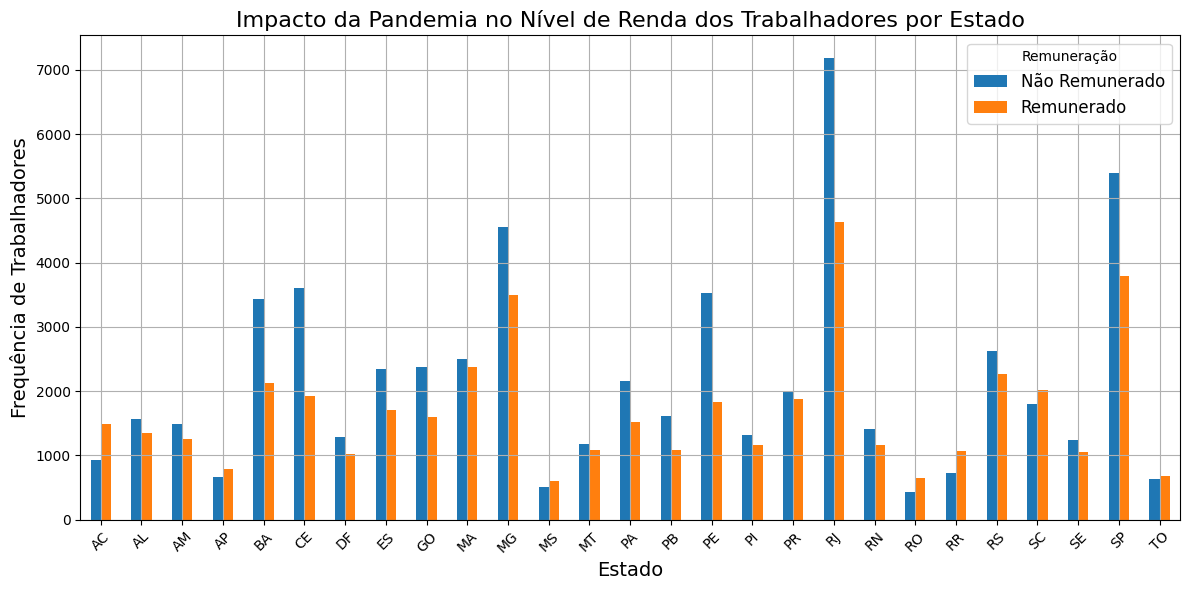

In [23]:
# Carregando o DataFrame
df9 = pd.read_csv('/content/Trabalho remunerado por estado.csv')

# Filtrando os dados para manter apenas os trabalhadores remunerados e não remunerados
df_filtered = df9[df9['Remunerado'].isin(['Sim', 'Não'])]

# Agrupando os dados por sigla_uf e Remunerado e somando a frequência
df_grouped = df_filtered.groupby(['sigla_uf', 'Remunerado'])['frequencia'].sum().unstack(fill_value=0)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))  # Aumentando a altura para melhor visualização

# Plotando o gráfico
df_grouped.plot(kind='bar', ax=ax)

# Configurando o gráfico
ax.set_title('Impacto da Pandemia no Nível de Renda dos Trabalhadores por Estado', fontsize=16)
ax.set_xlabel('Estado', fontsize=14)
ax.set_ylabel('Frequência de Trabalhadores', fontsize=14)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Remuneração', loc='upper right', labels=['Não Remunerado', 'Remunerado'], fontsize=12)
plt.grid()
# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

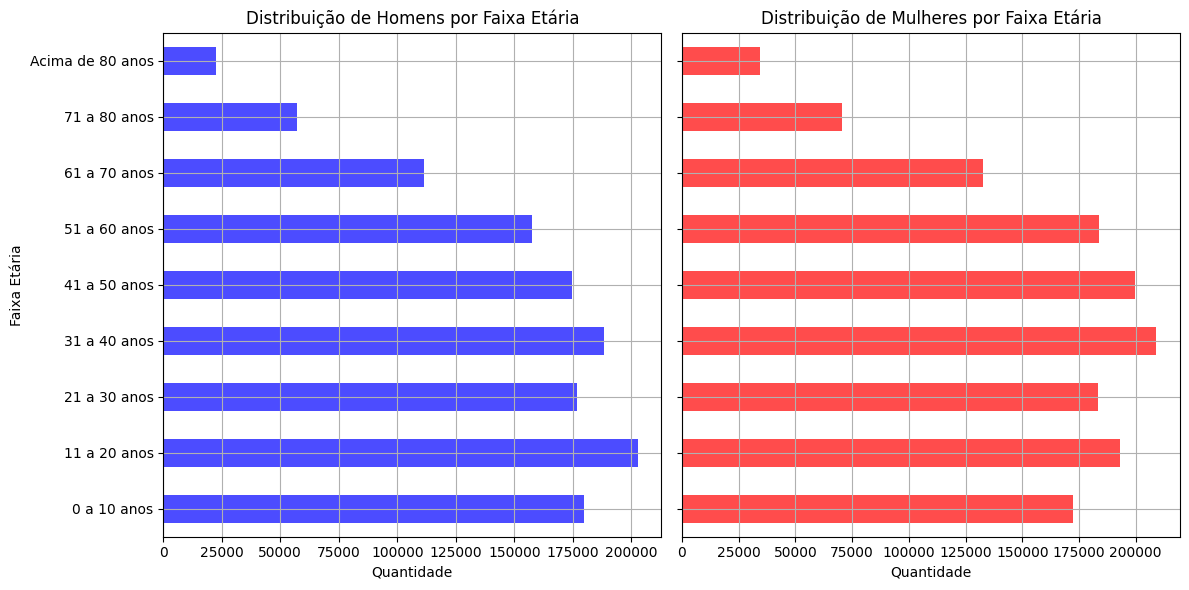

In [24]:
# Leitura do CSV gerado a partir do código SQL
df10 = pd.read_csv('/content/Idade e Sexo.csv')

# Agrupando os dados por gênero e faixa etária
df_homem = df10[df10['Genero'] == 'Homem'].groupby('Faixa_Etaria')['Frequencia'].sum()
df_mulher = df10[df10['Genero'] == 'Mulher'].groupby('Faixa_Etaria')['Frequencia'].sum()

# Criando subplots lado a lado
fig, axs = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

# Gráfico para Homens
df_homem.plot(kind='barh', ax=axs[0], color='blue', alpha=0.7)
axs[0].set_title('Distribuição de Homens por Faixa Etária')
axs[0].set_xlabel('Quantidade')
axs[0].set_ylabel('Faixa Etária')
axs[0].grid()  # Adicionando grid ao gráfico dos homens

# Gráfico para Mulheres
df_mulher.plot(kind='barh', ax=axs[1], color='red', alpha=0.7)
axs[1].set_title('Distribuição de Mulheres por Faixa Etária')
axs[1].set_xlabel('Quantidade')
axs[1].grid()  # Adicionando grid ao gráfico das mulheres

# Ajustando layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

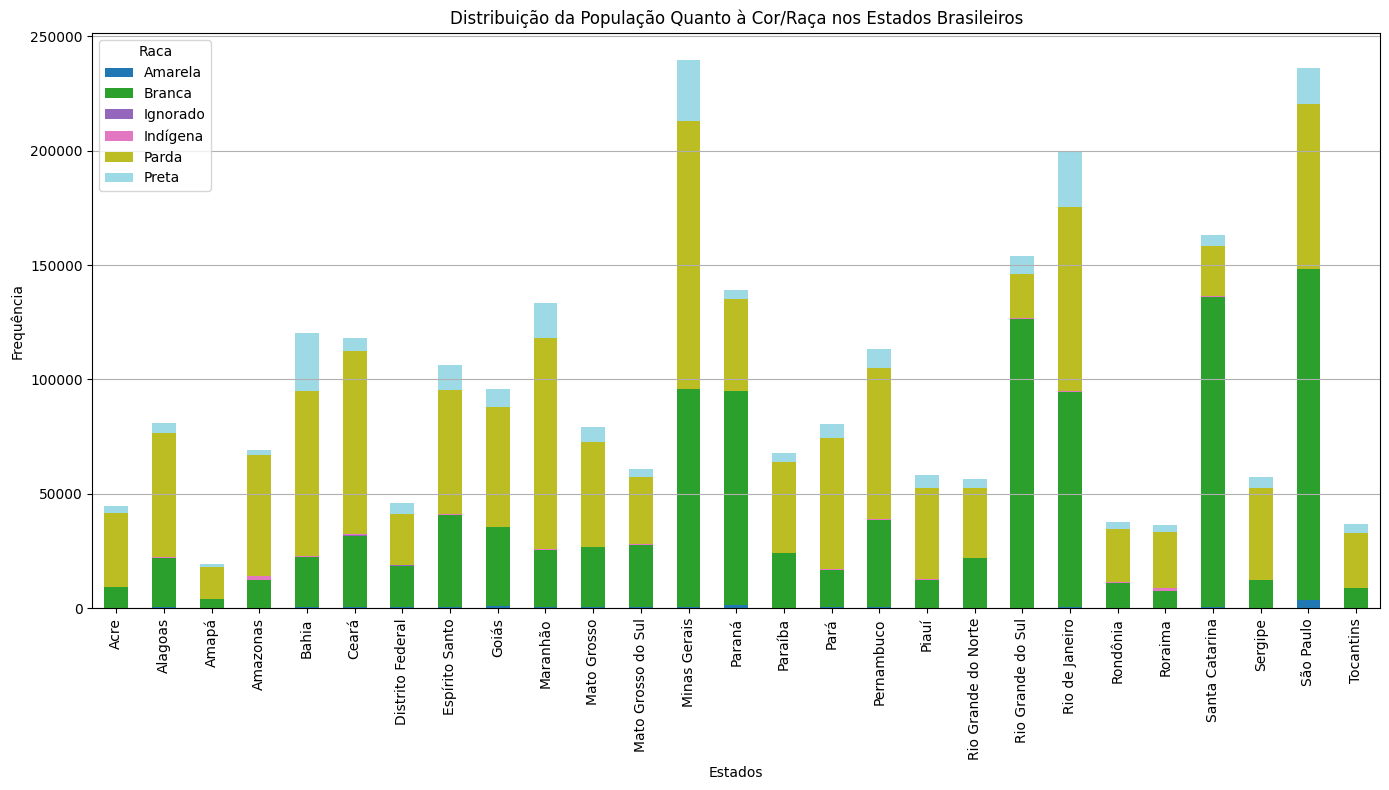

In [25]:
# Leitura do CSV gerado a partir do código SQL
df11 = pd.read_csv('/content/Raca por estado.csv')


# Agrupando os dados para plotar
df_grouped = df11.groupby(['Estados', 'Raca'])['frequencia'].sum().reset_index()

# Pivotando o DataFrame para criar colunas para cada raça
df_pivot = df_grouped.pivot(index='Estados', columns='Raca', values='frequencia').fillna(0)

# Criando o gráfico de barras empilhadas
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Configurando o gráfico
plt.title('Distribuição da População Quanto à Cor/Raça nos Estados Brasileiros')
plt.xlabel('Estados')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

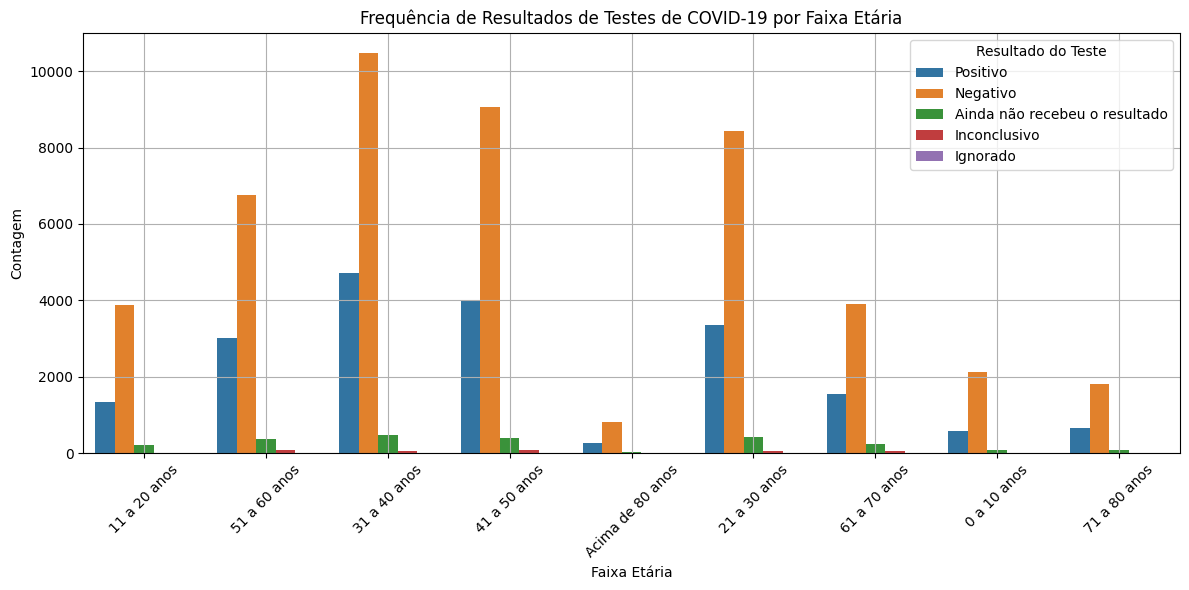

In [26]:
df12 = pd.read_csv('/content/Covid por idade.csv')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df12, x='Faixa_Etaria', y='contagem', hue='Teste_Covid')

# Adicionar título e rótulos
plt.title('Frequência de Resultados de Testes de COVID-19 por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Resultado do Teste')
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

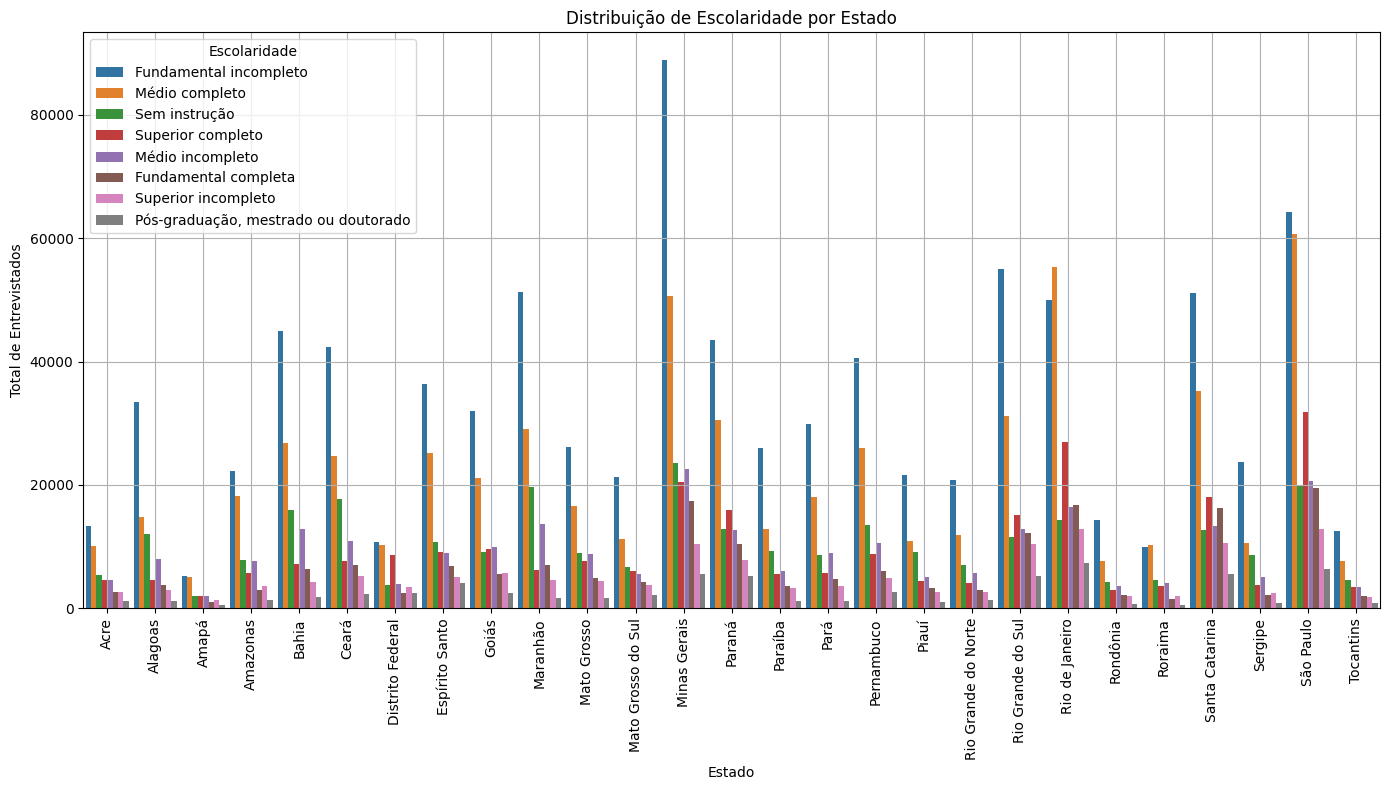

In [27]:
# Carregar os dados de escolaridade por estado
df5 = pd.read_csv('/content/Escolaridade por estado.csv')

# Ajustar o tamanho da figura
plt.figure(figsize=(14, 8))

# Criar o gráfico de barras para mostrar a escolaridade por estado
sns.barplot(x='Estado', y='Total_Entrevistados', hue='Escolaridade', data=df5, width=0.9)  # Aumentar a largura das barras

# Adicionar título e rótulos
plt.title('Distribuição de Escolaridade por Estado')
plt.xlabel('Estado')
plt.ylabel('Total de Entrevistados')
plt.xticks(rotation=90)

# Exibir a legenda
plt.legend(title='Escolaridade')
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()